                            
   ## Hypertension Prediction Analysis.                  
 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the data 
data = pd.read_csv("C:/DS535/Week4proj/hypertension_data.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


 # Predictors
 

age: Age of the patient.

sex: Sex of the patient (1 = male, 0 = female).

cp: Chest pain type (4 types).

trestbps: Resting blood pressure (in mm Hg).

chol: Serum cholesterol level (in mg/dl).

fbs: Fasting blood sugar (1 = true, 0 = false).

restecg: Resting electrocardiographic results (values 0, 1, 2).

thalach: Maximum heart rate achieved.

exang: Exercise induced angina (1 = yes, 0 = no).

oldpeak: Depression induced by exercise relative to rest.

slope: Slope of the peak exercise ST segment (values 0, 1, 2).

ca: Number of major vessels colored by fluoroscopy (0-3).

thal: Thalassemia (3 types).


# Target Variable

target: Presence or absence of hypertension (1 = presence, 0 = absence).

In [4]:
# Display basic information
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB
None


# Categorical Variables

sex: Represents gender (0 or 1).

cp: Chest pain type (integer, representing categories).

fbs: Fasting blood sugar (binary, 0 or 1).

restecg: Resting electrocardiographic results (integer categories).

exang: Exercise-induced angina (binary, 0 or 1).

slope: Slope of the peak exercise ST segment (categorical, 0, 1, or 2).




ca: Number of major vessels colored by fluoroscopy (integer categories).

thal: Thalassemia category (integer categories).


target: Presence of hypertension (binary, 0 or 1).


# Numerical Variables

age: Continuous variable representing age.

trestbps: Resting blood pressure (continuous).

chol: Serum cholesterol in mg/dL (continuous).

thalach: Maximum heart rate achieved (continuous).

oldpeak: ST depression induced by exercise relative to rest (continuous).

In [5]:
print(data.describe())

                age          sex            cp      trestbps          chol  \
count  26083.000000  26058.00000  26083.000000  26083.000000  26083.000000   
mean      55.661389      0.50000      0.958594    131.592992    246.246061   
std       15.189768      0.50001      1.023931     17.588809     51.643522   
min       11.000000      0.00000      0.000000     94.000000    126.000000   
25%       44.000000      0.00000      0.000000    120.000000    211.000000   
50%       56.000000      0.50000      1.000000    130.000000    240.000000   
75%       67.000000      1.00000      2.000000    140.000000    275.000000   
max       98.000000      1.00000      3.000000    200.000000    564.000000   

                fbs       restecg       thalach         exang       oldpeak  \
count  26083.000000  26083.000000  26083.000000  26083.000000  26083.000000   
mean       0.149753      0.526512    149.655024      0.326573      1.039512   
std        0.356836      0.525641     22.858109      0.46896

# Key Insights:

Age:

Mean age is 55.66 years with a standard deviation of 15.19, indicating a broad age range in the dataset.
The minimum age is 11 years, and the maximum is 98 years.


Sex:

The average value is 0.5, reflecting an approximately even distribution between males (1) and females (0).

Chest Pain Type (cp):

Mean value of 0.96 indicates most participants likely belong to lower chest pain categories (closer to 0).
Distribution ranges from 0 to 3, covering all chest pain types.


Resting Blood Pressure (trestbps):

Mean resting blood pressure is around 131.59 mm Hg, with values ranging from 94 to 200 mm Hg.

Cholesterol (chol):


The mean cholesterol level is 246.25 mg/dL, which is elevated, considering normal values are usually below 200 mg/dL.

Fasting Blood Sugar (fbs):


Mean is 0.15, showing that about 15% of the participants have fasting blood sugar > 120 mg/dL (coded as 1).


Thalach (Maximum Heart Rate Achieved):


The mean heart rate is 149.66 bpm, with a minimum of 71 bpm and a maximum of 202 bpm.


Exercise-induced Angina (exang):

Around 32.6% of participants experience exercise-induced angina (mean = 0.33).


Oldpeak:

The average ST depression induced by exercise relative to rest is 1.04, with values as high as 6.2, indicating considerable 

variability.


Slope:

Mean slope value is 1.4, which indicates most participants have upsloping ST segments (1).


CA (Number of Major Vessels Colored by Fluoroscopy):

Most participants have 0 major vessels colored by fluoroscopy (mean = 0.72).


Thalassemia (thal):

Mean thalassemia value is 2.32, reflecting that most participants have normal or fixed defect thalassemia (2).


Target:

The target variable has a mean of 0.55, suggesting the dataset is nearly balanced between participants with hypertension (1) and those without (0).

# 1. Data Cleaning

In [6]:
import pandas as pd

# Check for missing values in each column
print(data.isnull().sum())


age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64


There are 25 missing values

Removing 25 observations from a dataset of 26,083 entries is a relatively small change and is unlikely to have a significant impact on the overall analysis or model performance. Here’s why:

Impact of Removing 25 Observations
Percentage of Dataset:

Removing 25 out of 26,083 observations represents approximately 0.1% of the dataset. This small percentage generally means that the loss of data is minimal.
Statistical Significance:

With such a small proportion of missing data, the statistical properties of the dataset (mean, variance, etc.) are unlikely to be substantially altered.

In [7]:
import pandas as pd

# Assuming data is your DataFrame
df = data.dropna()



In [8]:

# Verify that missing values have been removed
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# 2. Understand Distributions

We will visualize distributions, correlations, and relationships between variables to better understand the data before modeling.

a step-by-step outline for the EDA:


1. Distribution of Numerical Variables:

We’ll plot histograms or KDE plots to understand the distribution of the continuous variables such as age, thalach, trestbps, chol, etc.

2. Countplots for Categorical Variables:

We’ll create countplots to visualize the distribution of categorical variables like sex, cp, restecg, exang, etc.

3. Correlation Heatmap:

A correlation matrix to visualize the relationships between numerical variables and their correlation with the target variable.

4. Pairplot:

A pairplot to observe pairwise relationships between multiple variables.

5. Boxplots:

Boxplots to explore the relationships between categorical variables and numerical variables (e.g., thalach by sex, chol by cp).

# 2.1. Distribution of Numerical Variables (Histograms/KDE plots)

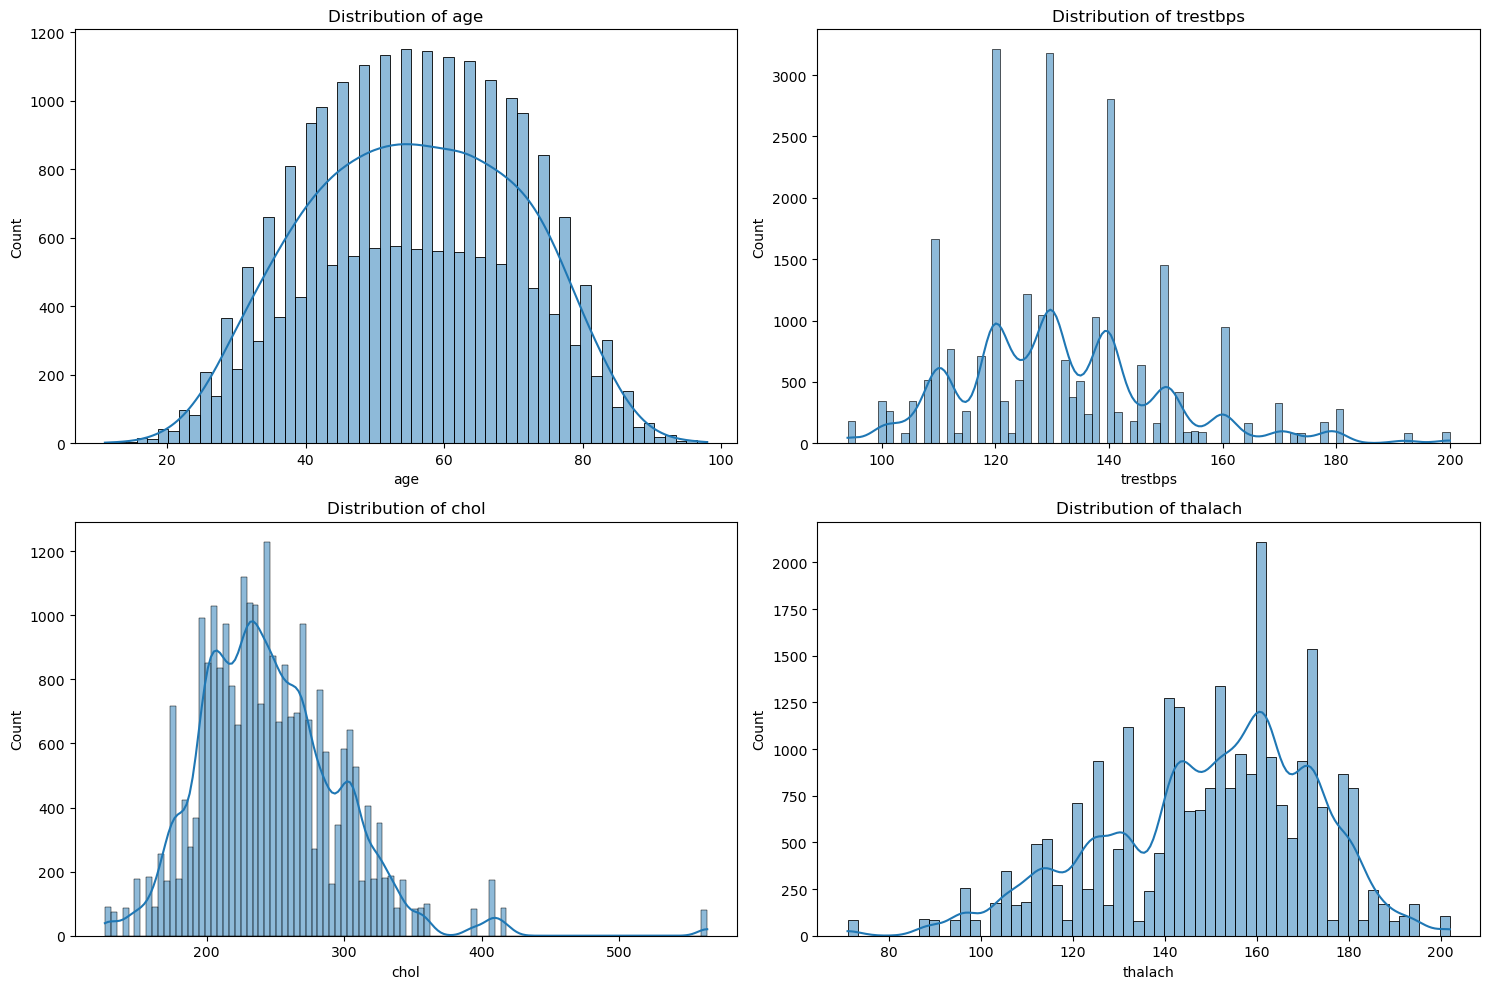

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Flatten axes array to iterate easily
axes = axes.flatten()

# Plot histograms/KDE plots for numerical columns in a 2x2 grid
for i, col in enumerate(numerical_columns[:4]):  # Adjust to first 4 numerical columns for the 2x2 grid
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()





# 2.2 Countplots for Categorical Variables

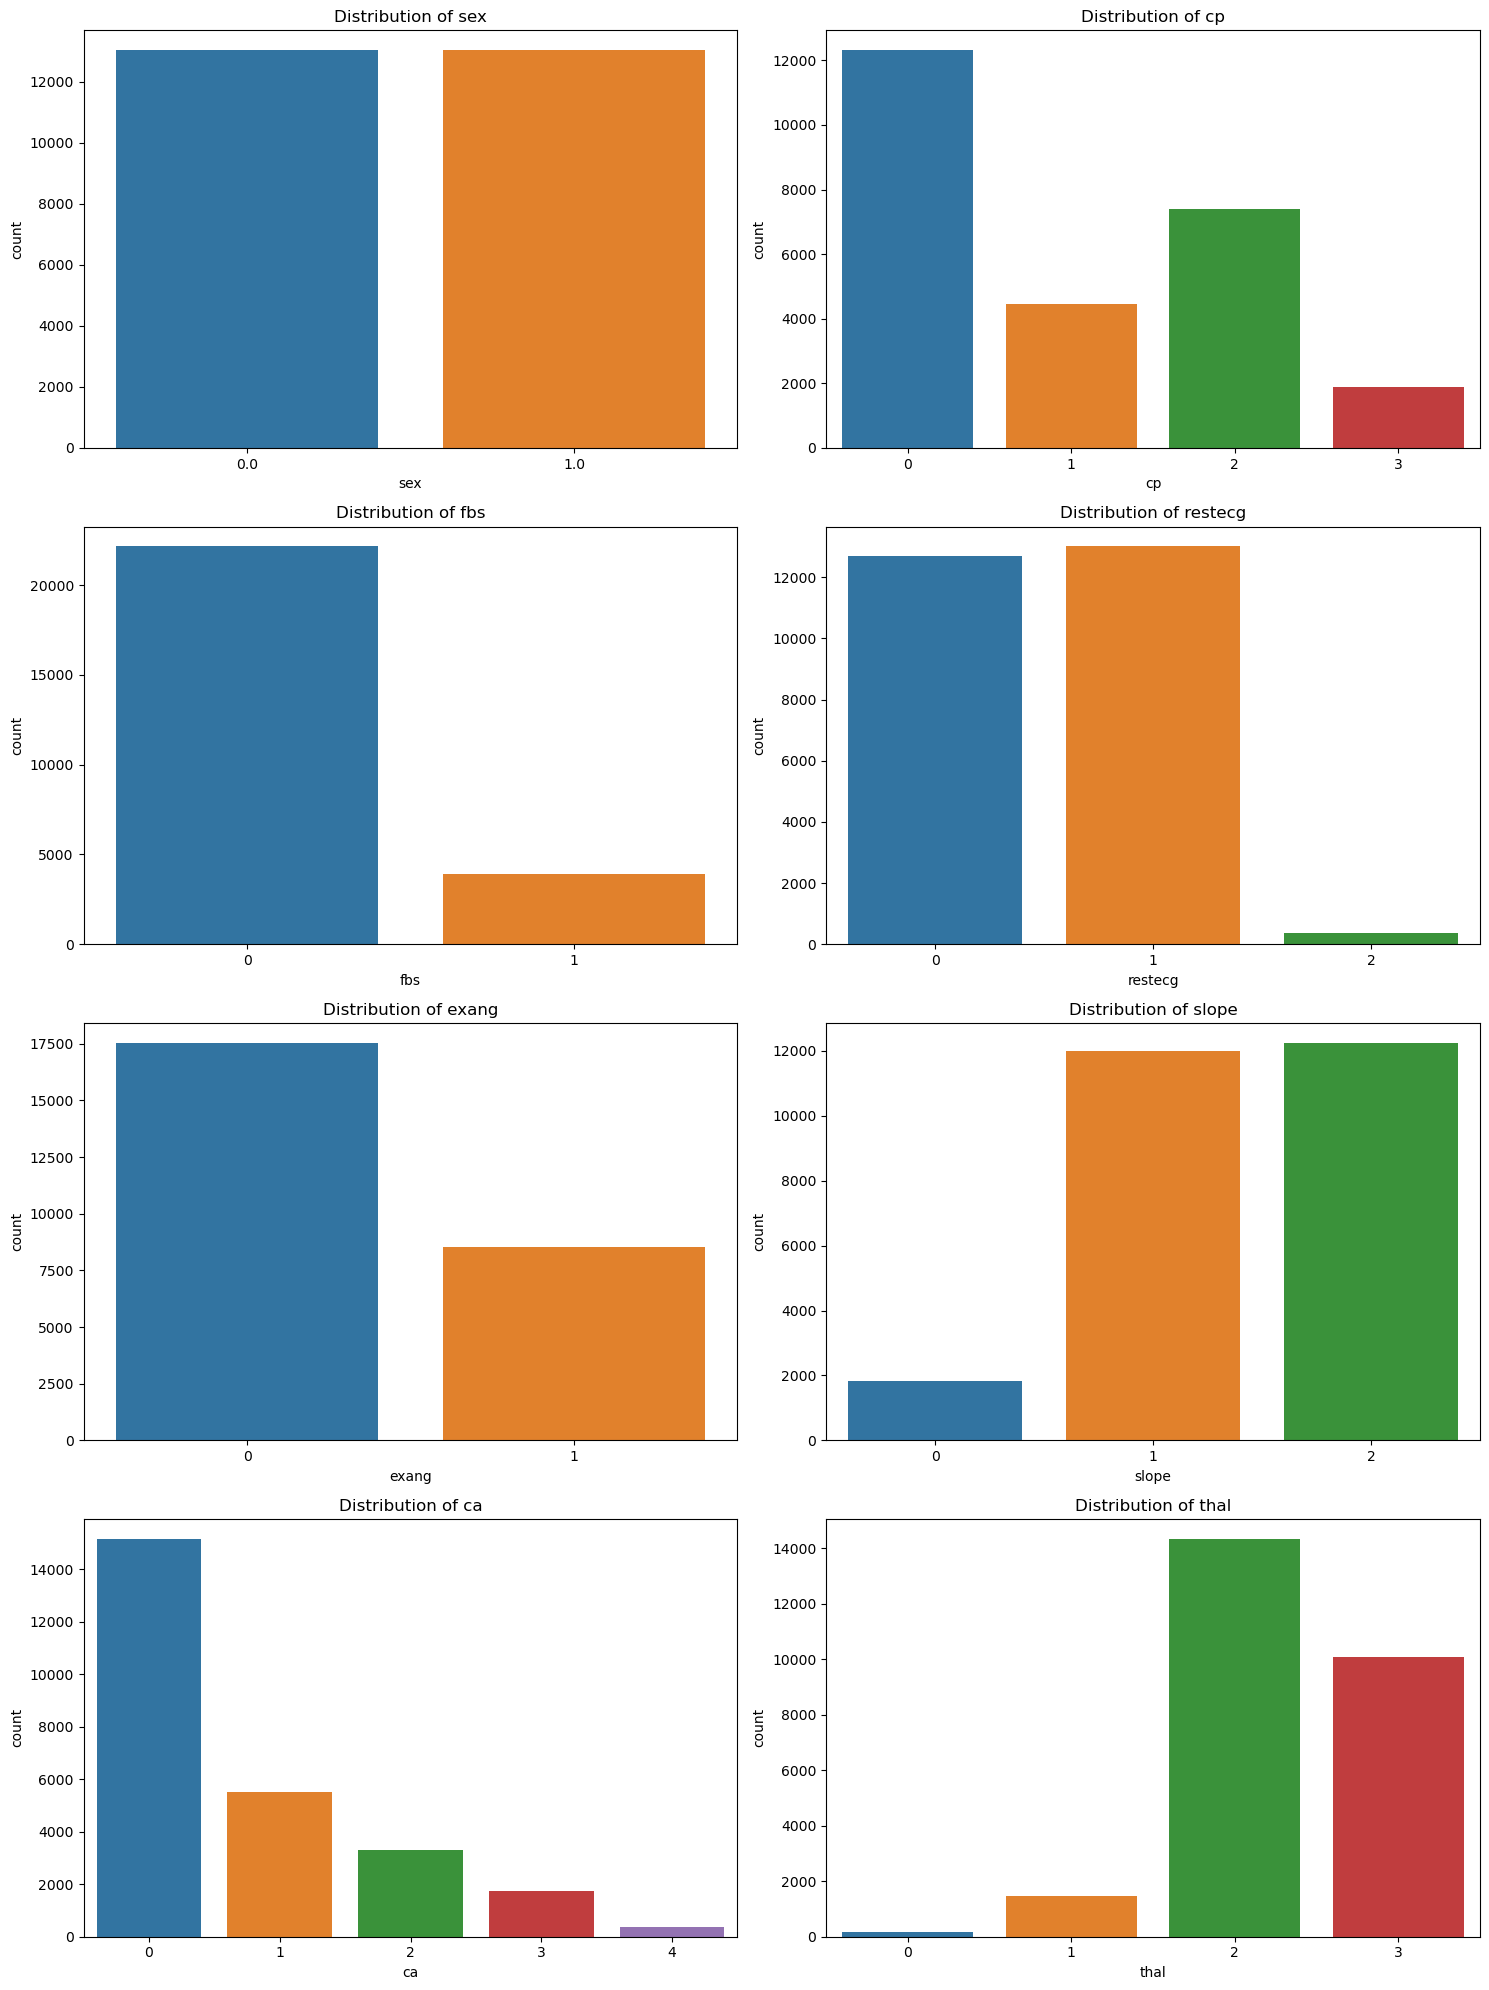

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Create a 4x2 grid of plots (since we have 8 categorical columns)
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# Flatten axes array to iterate easily
axes = axes.flatten()

# Plot countplots for categorical columns in a 4x2 grid
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()



# 2.3. Correlation Heatmap

This will give you a heatmap of the correlation between numerical variables.

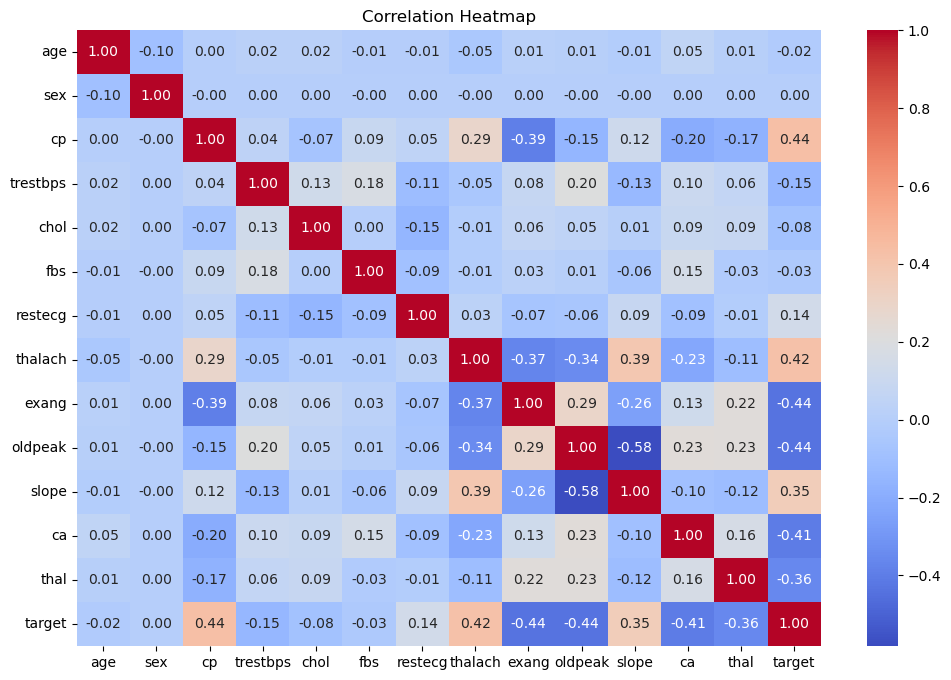

In [11]:
# Correlation matrix and heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



# 2.4. Pairplot

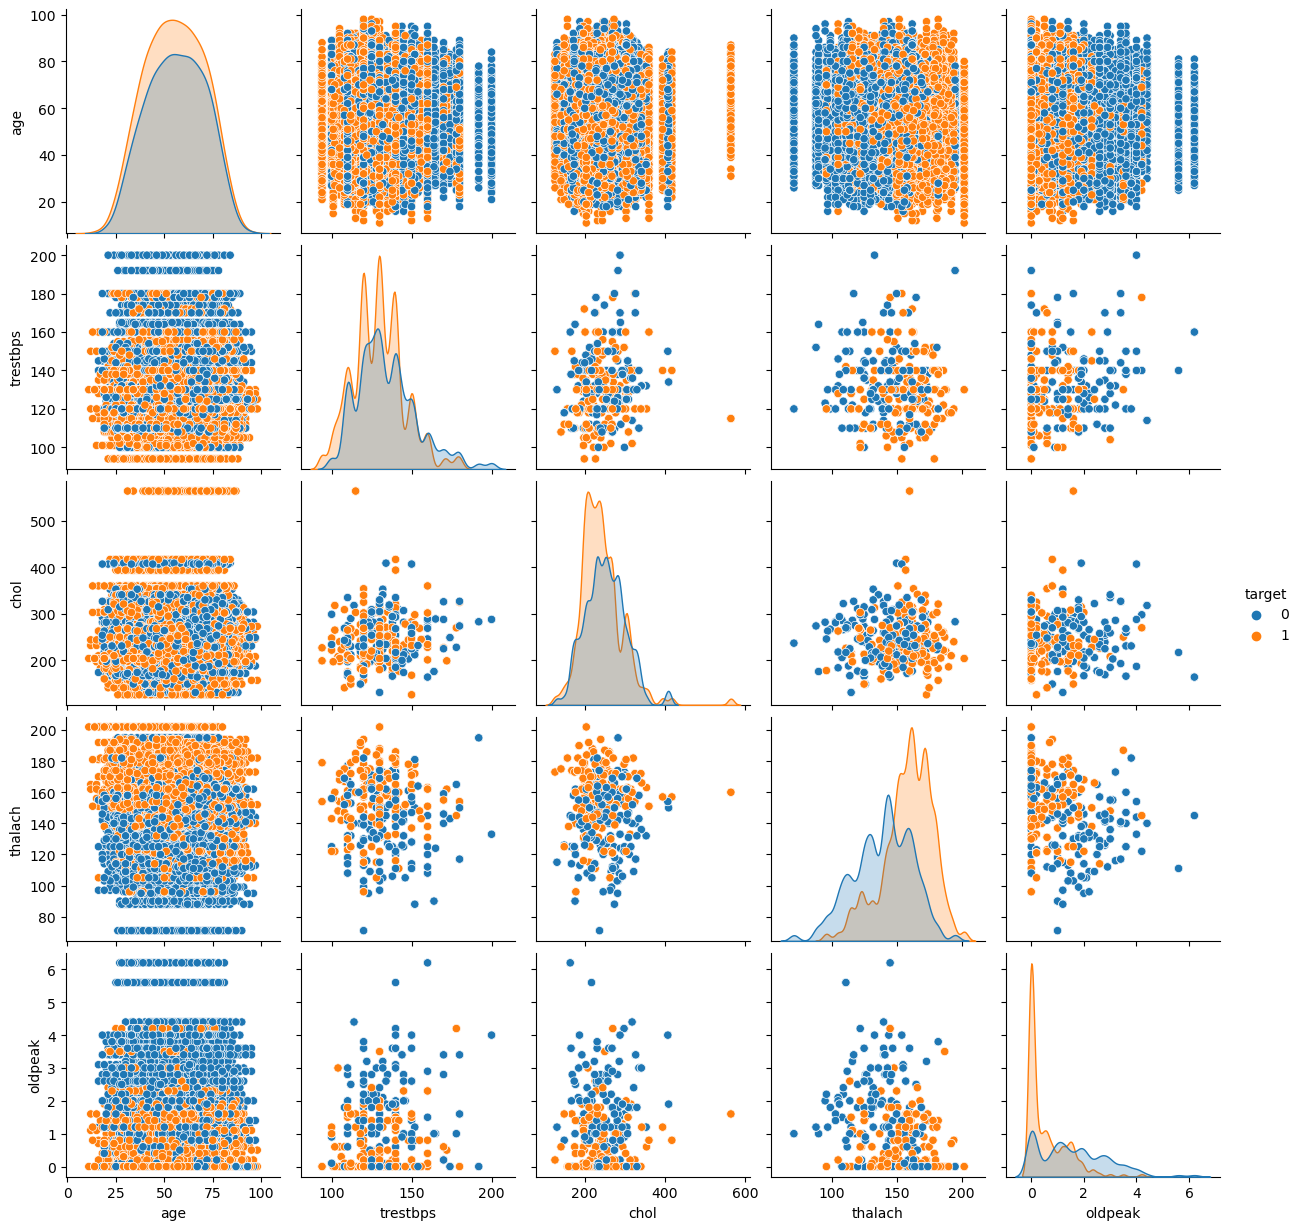

In [12]:
# Pairplot for selected columns
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue='target', diag_kind='kde')
plt.show()


# 2.5. Boxplots

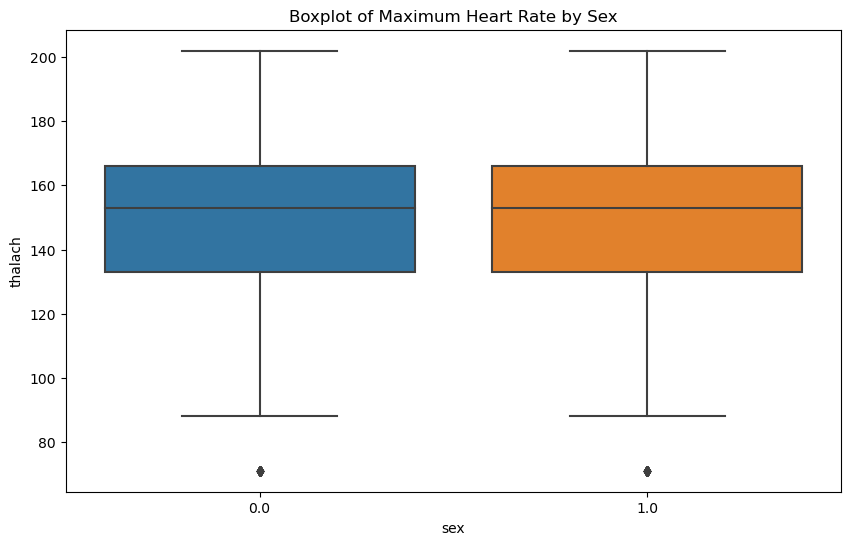

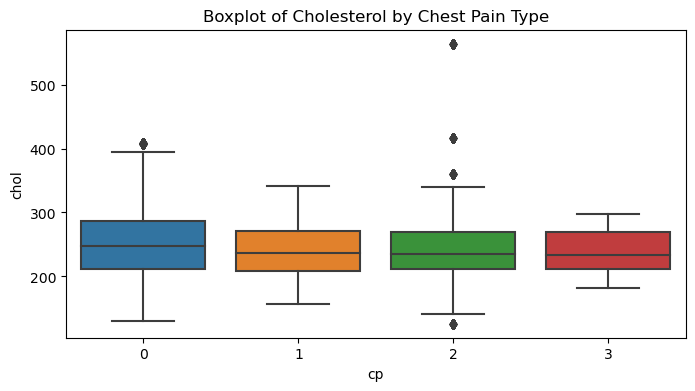

In [13]:
# Boxplots for numerical variables based on categorical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sex', y='thalach')
plt.title('Boxplot of Maximum Heart Rate by Sex')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='cp', y='chol')
plt.title('Boxplot of Cholesterol by Chest Pain Type')
plt.show()


# 3.  Model Building



# 3 Step 1: Data Preparation

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define your target and features
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 3 Step 2: Model Training

In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train_scaled, y_train)


LogisticRegression()

# 3 Step 3: Model Evaluation

Accuracy: 0.8563
Precision: 0.8392
Recall: 0.9167
F1-Score: 0.8763


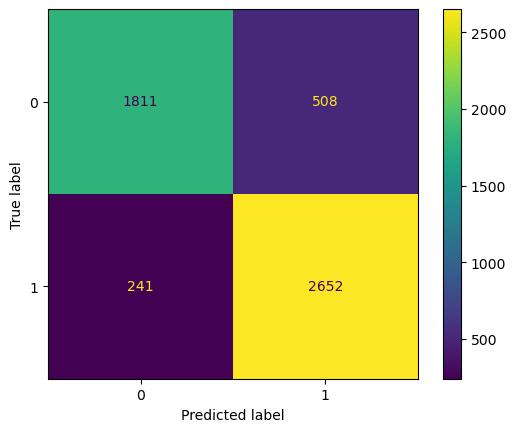

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = logreg.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# Metrics Interpretation:

Accuracy: 0.8563

Meaning: Approximately 85.63% of the predictions made by the model are correct. This is a good accuracy rate, indicating that the model is performing well overall in classifying the data.

Precision: 0.8392

Meaning: Of all the instances predicted as having hypertension, approximately 83.92% are actually hypertensive. Precision is particularly important when the cost of false positives is high. In this case, it measures how well the model avoids incorrectly classifying individuals as having hypertension when they do not.

Recall: 0.9167

Meaning: Out of all the actual cases of hypertension, the model correctly identifies 91.67% of them. Recall is crucial when the cost of missing actual cases (false negatives) is high. In this context, a high recall value indicates that the model is good at detecting those who actually have hypertension.

F1-Score: 0.8763

Meaning: The F1-Score is the harmonic mean of precision and recall. It provides a single metric that balances both the precision and recall. An F1-Score of 0.8763 suggests a good balance between precision and recall, meaning the model performs well in both detecting true positives and minimizing false positives.


Contextual Analysis:

High Recall: The model is particularly effective at identifying individuals with hypertension. This is important in a medical context where failing to detect a true case of hypertension (false negative) could have serious health implications.

Good Precision: While the model does a good job of identifying hypertension cases, there's a small chance that some individuals predicted to have hypertension might not actually have it. This trade-off is acceptable in many scenarios where the cost of missing a case is higher than falsely identifying one.

Balanced Performance: The high F1-Score indicates that the model maintains a balance between precision and recall, which is beneficial in ensuring that both false positives and false negatives are kept to a reasonable level.

Summary:
Overall, the logistic regression model is performing well in predicting hypertension, with a good balance between detecting true cases and minimizing false positives. This performance is especially useful in medical scenarios where detecting true cases is crucial, and we want to minimize the chance of missing those who need treatment.

## Why Feature Selection Matters

Interpretability: Understanding which features are most influential helps in interpreting the model and the relationships between features and the target variable.
Model Performance: Reducing the number of irrelevant or less important features can lead to better model performance by reducing overfitting and improving generalization.
Efficiency: Fewer features can mean faster training times and less computational resource usage.

# 4. features selection 

#  Backward Elimination

Backward elimination starts with all features and removes one feature at a time based on some criteria, usually removing the 

feature that has the least impact on the model.


In [21]:
import statsmodels.api as sm

def backward_elimination(X, y):
    """ Perform backward feature elimination """
    features = list(X.columns)
    best_aic = np.inf

    while features:
        X_train_subset = X[features]
        X_train_subset = sm.add_constant(X_train_subset)  # Add constant for intercept
        model = sm.Logit(y, X_train_subset).fit(disp=0)
        current_aic = model.aic

        # Find the feature with the highest p-value
        p_values = model.pvalues
        max_p_value = p_values[1:].max()  # Exclude constant term
        feature_to_remove = p_values[1:].idxmax()

        if max_p_value > 0.05:  # Use 0.05 as threshold for removal
            features.remove(feature_to_remove)
        else:
            break

    return features

# Perform backward elimination
selected_features = backward_elimination(X_train, y_train)
print(f"Selected features: {selected_features}")


Selected features: ['cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


# 5. Best Model Selection

Let's  create a logistic regression model using only the selected features from backward selection. Then, we'll evaluate the 

performance of this new model to see if it improves compared to the original model.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Selected features from backward selection
selected_features = ['cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Create a new training and testing set with only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model to the selected features
model.fit(X_train_selected, y_train)

# Predict the target variable for both the train and test sets
y_train_pred = model.predict(X_train_selected)
y_test_pred = model.predict(X_test_selected)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.8582
Precision: 0.8397
Recall: 0.9202
F1-Score: 0.8781


# 5.1 

The model's performance with the selected features from backward selection has slightly improved compared to the previous model

with all the features:

Accuracy increased from 0.8563 to 0.8582.
Precision increased from 0.8392 to 0.8397.
Recall increased from 0.9167 to 0.9202.
F1-Score increased from 0.8763 to 0.8781.

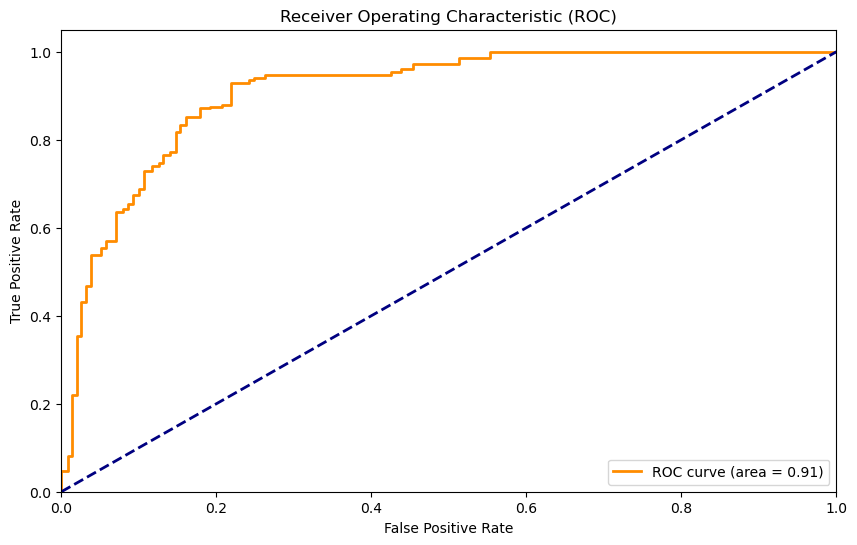

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Select the features based on backward selection
selected_features = ['cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Define your target and features
X = df[selected_features]
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# brief interpretation:

An ROC AUC score of 0.91 is excellent! It indicates that the logistic regression model performs very well in distinguishing 

between the positive and negative classes.



ROC AUC Score (0.91): This value suggests that the model has a high level of discriminative ability. An AUC of 0.5 would 

indicate no discrimination (i.e., the model is no better than random guessing), while an AUC of 1.0 indicates perfect 

discrimination. With a score of 0.91, the model is quite effective at predicting the presence or absence of hypertension.